In [237]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.decomposition import PCA
from sklearn import svm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
import decimal

# Introduction

This classification code is to explore the three most powerful classification algorithms: SVM, Random Forest and XGBoost on the divorce data set we chose. The data description for this data set is included in the visualization code. We tunning the parameters of these three algorithms, and find the parameters that give us the highest accuracies on the test data set. 

In [4]:
# read the dataset to python
data_dir = 'data'

with open(os.path.join(data_dir, 'divorce.csv')) as clean_data_file:
    data = pd.read_csv(clean_data_file, delimiter=';')

In [116]:
# X is the data while y is the label for the data.
X = data.iloc[:, :-1].to_numpy()
y = data.iloc[:, -1].to_numpy()

# split the data into train and test sets, with 0.3 of the data belong to the test set.
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.3, random_state=30)

In [305]:
def accuracy_plot(parameters_list, accuracy_list, parameter_name):
    '''
    plot the prediction accuracy as a function of 
    a certian parameter of the model
    '''
    
    plt.figure(figsize = (10,6))
    plt.plot(parameters_list, accuracy_list)
    max_acc = "{:.2f}".format(np.max(accuracy_list))
    plt.axvline(x=parameters_list[np.argmax(accuracy_list)],label = 'maximum accuracy = %s'% max_acc,color='red')
    plt.xlabel(parameter_name,fontsize = 15)
    plt.ylabel('Accuracy',fontsize = 15)
    plt.title('Accuracy vs parameter',fontsize = 15)
    plt.legend(fontsize = 15,loc='lower right')
    plt.show()
    
    

    

# SVM

SVMs (support-vector machines) are supervised learning methods used for classification, regression and outlier detection by building a support-vector machine which constructs a hyperplane or set of hyperplanes in a high-dimensional space. The largest functional margin, which is the distance between the hyperplane and the nearest training-data point can be viewed as the sign of a good separation. SVMs have high efficiency when working with high dimensional spaces. They also have high efficiency for memory using, because they only use a subset of training points in the decision vector.




## Tuning Parameters: Kernel Parameters

The two important parameters, when we train an SVM with the Radial Basis Funtion (rbf)

\begin{equation}
\exp \left(-\gamma\left\|x-x^{\prime}\right\|^{2}\right)
\end{equation}

are "c" and "gamma".
The "c" parameter trades off misclassification of training examples against the simplicity of the decision surface. In other words, c behaves as a regularization parameter in the SVM. Small "c" will lead to a smooth decision surface, while large "c" try to give every sample a correct classification. The "gamma" parameter can be treated as the inverse of the radius of influence of samples selected by the model as support vectors. When this parameter is small, the influence of a single training sample reach is far, and when this value is large, the effect becomes closer.

It is very important to select a proper value for "c" and "gamma", here we tune these two parameters to see how the test accuracy change.

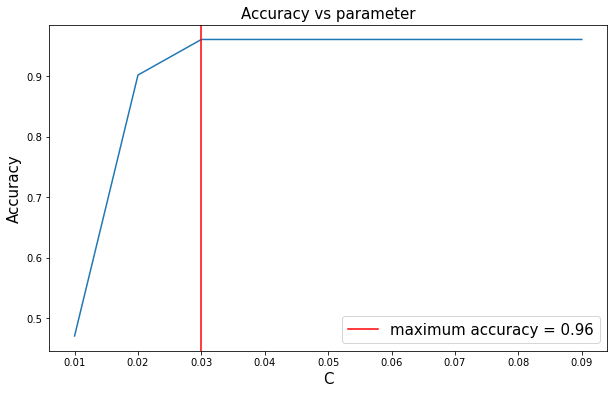

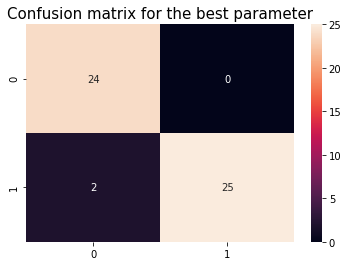

In [306]:
#explore the parameter range
C_range = np.arange(0.01,0.1,1e-2)
svc_rbf_c = []
for C in C_range:
    clf = svm.SVC(C=C)
    clf.fit(X_train,y_train)
    svc_rbf_c.append(np.sum(clf.predict(X_test) == y_test)/len(y_test))

accuracy_plot(C_range, svc_rbf_c, 'C')

# calculate the confusion matrix of the best parameter
best_para = C_range[np.argmax(svc_rbf_c)]
best_svm_model = svm.SVC(C = best_para, random_state=42)
best_svm_model.fit(X_train,y_train)
y_pred = best_svm_model.predict(X_test)

# Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
plt.title('Confusion matrix for the best parameter',fontsize = 15)
sns.heatmap(cf_matrix, annot=True)
plt.show()


## Inerpretation

When parameter C is lower than 0.3, the test accuracy for the model is increases as C increasing. When C is higher than 0.3, the accuracy is saturated and reaches its maximum value, 0.96.

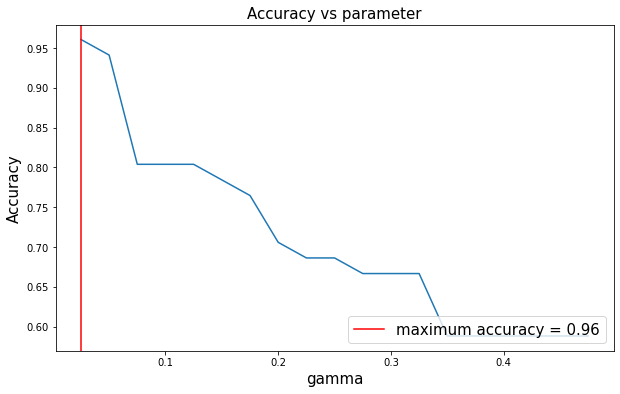

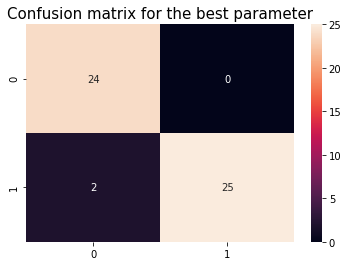

In [307]:
#explore the parameter range
gamma_list = np.arange (1/40,1/2,1/40)
svm_rbf_gamma = []
for i in (gamma_list):
    
    clf = svm.SVC(kernel = "rbf",gamma = i, random_state = 42)
    clf.fit(X_train,y_train)   
    svm_rbf_gamma.append(np.sum(clf.predict(X_test) == y_test)/len(y_test))
    
accuracy_plot(gamma_list, svm_rbf_gamma, 'gamma')

# calculate the confusion matrix of the best parameter
best_para = gamma_list[np.argmax(svm_rbf_gamma)]
best_svm_model = svm.SVC(gamma = best_para, random_state = 42)
best_svm_model.fit(X_train,y_train)
y_pred = best_svm_model.predict(X_test)

# Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
plt.title('Confusion matrix for the best parameter',fontsize = 15)
sns.heatmap(cf_matrix, annot=True)
plt.show()

## Interpretation 

The test accuracy decreases as the value of gamma increases, that is the radius of influence of samples selected by the model as support vectors decrease. When gamma reaches 0.35, the accuracy hits the minimum value and remains unchanged in the gamma range we select.

## Other kernel functions for SVC

Here we also try other kernal functions for SVC model.

Linear kernel function:

\begin{equation}
\left\langle x, x^{\prime}\right\rangle
\end{equation}

polynomial kernel function:

\begin{equation}
\left(\gamma\left\langle x, x^{\prime}\right\rangle+r\right)^{d}
\end{equation}

sigmoid kernel function:

\begin{equation}
\left(\gamma\left\langle x, x^{\prime}\right\rangle+r\right)
\end{equation}

But only the defaul values are used here.



The accuracy for SVM with linear kernel function is:
0.96


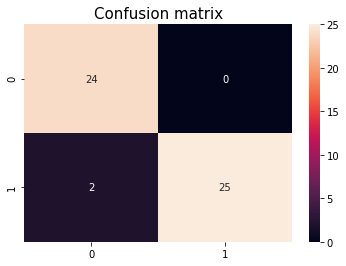

In [279]:
clf = svm.SVC(kernel = "linear", random_state = 42)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy = "{:.2f}".format(accuracy_score(y_test, y_pred))

print("The accuracy for SVM with linear kernel function is:")
print(accuracy)

#confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
plt.title('Confusion matrix',fontsize = 15)
sns.heatmap(cf_matrix, annot=True)
plt.show()


The accuracy for SVM with polynomial kernel function is:
0.96


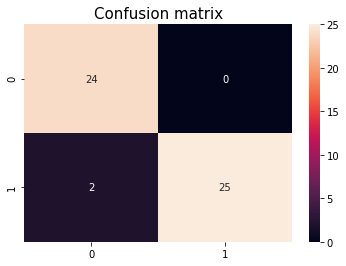

In [278]:
clf = svm.SVC(kernel = 'poly', random_state = 42)
clf.fit(X_train,y_train)   
y_pred = clf.predict(X_test)
accuracy = "{:.2f}".format(accuracy_score(y_test, y_pred))

print("The accuracy for SVM with polynomial kernel function is:")
print(accuracy)

#confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
plt.title('Confusion matrix',fontsize = 15)
sns.heatmap(cf_matrix, annot=True)
plt.show()


The accuracy for SVM with polynomial kernel function is:
0.33


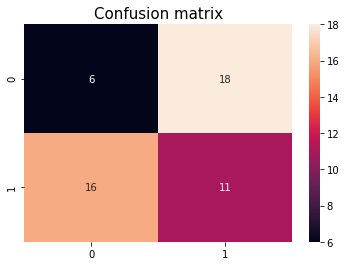

In [280]:
clf = svm.SVC(kernel = "sigmoid", random_state = 42)
clf.fit(X_train,y_train)   
y_pred = clf.predict(X_test)
accuracy = "{:.2f}".format(accuracy_score(y_test, y_pred))

print("The accuracy for SVM with polynomial kernel function is:")
print(accuracy)

#confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
plt.title('Confusion matrix',fontsize = 15)
sns.heatmap(cf_matrix, annot=True)
plt.show()


## Interpretation 

When the kernel function is set to linear or polynomial, the test accuracies for SVMs can both reach the maximum accuracy when the kernel function is set to rbf, which is 0.96. However, if we set the kernel function to sigmoid, the model has a very low test accuracy which is only 0.33.

# Random Forest

Random forest constructs a number of decision trees during the training. By fitting those decision trees on different subsets of the data and averaging the results, the random forest improves the predicted accuracy and avoid over-fitting. For the classification task, the result by the random forest is the class selected by most of the decision trees.

## Tuning Parameters: max_samples

Here we tune the sub sample size of the training data chosen to build the decision trees by changing the max_samples parameters

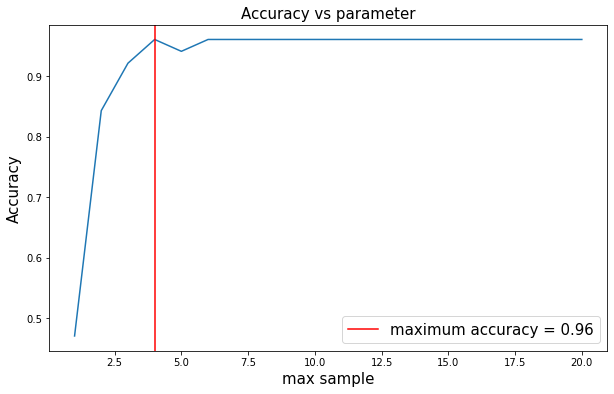

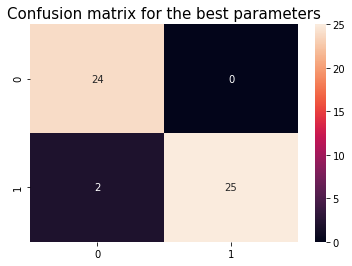

In [309]:
# explore the parameter range 
max_samples_par = []
max_sample_range = np.arange (1,21,1)
for i in max_sample_range:
    clf = RandomForestClassifier(max_samples = i,random_state = 42)
    clf.fit(X_train,y_train)
    max_samples_par.append(np.sum(clf.predict(X_test) == y_test)/len(y_test))

accuracy_plot(max_sample_range, max_samples_par, 'max sample')

# calculate the confusion matrix of the best parameter
best_para = max_sample_range[np.argmax(max_samples_par)]
best_rf_model = RandomForestClassifier(max_samples = best_para, random_state=42)
best_rf_model.fit(X_train,y_train)
y_pred = best_rf_model.predict(X_test)

# Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
plt.title('Confusion matrix for the best parameters',fontsize = 15)
sns.heatmap(cf_matrix, annot=True)
plt.show()

## Interpretation

When the maximum size of the sub sample is set to lower than 7, the accuracy will increase with the increase of the maximum size of the sub sample. When the maximum size is set to larger than 7, the accuracy reaches its saturated value which is 0.96.

## Tuning Parameters: n_estimators

Here we change the number of trees in the forest by tuning the parameter n_esitmators

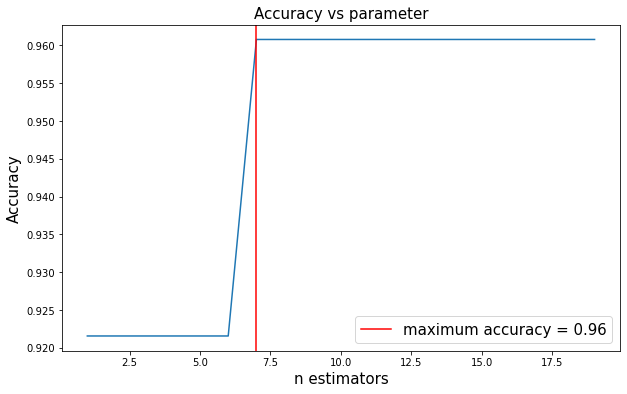

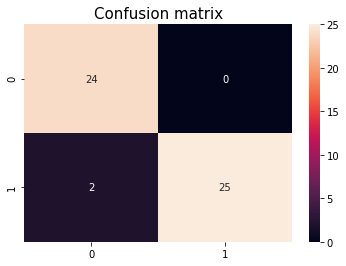

In [310]:
# explore the parameter range
max_n_estimator_par = []
max_n_estimator_range = np.arange (1,20,1)
for i in max_n_estimator_range:
    clf = RandomForestClassifier(n_estimators = i,random_state = 30)
    clf.fit(X_train,y_train)
    max_n_estimator_par.append(np.sum(clf.predict(X_test) == y_test)/len(y_test))

accuracy_plot(max_n_estimator_range, max_n_estimator_par, 'n estimators')

# calculate the confusion matrix of the best parameter
best_para = max_n_estimator_range[np.argmax(max_n_estimator_par)]
best_rf_model = RandomForestClassifier(n_estimators = best_para, random_state = 30)
best_rf_model.fit(X_train,y_train)
y_pred = best_rf_model.predict(X_test)

# Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
plt.title('Confusion matrix',fontsize = 15)
sns.heatmap(cf_matrix, annot=True)
plt.show()

## Interpretation

When the value of n_estimators is set to be higher than 7, the test accuracy will reach its maximum value, 0.96

# XGBoost

The full name of XGBoost is “eXtreme Gradient Boosting.” The "eXtreme" refers to the improvement of speed. The parallel computing and cache awareness makes XGBoost almost ten times faster than the traditional Gradient Boost. For Gradient Boosting. The training samples which do not get a good result in the previous models will have higher weight to be selected in the following training model, which enables the weak learner to be trained into a strong learner.

In [312]:
conda install -c conda-forge xgboost

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [292]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

## Tuning parameters: n_estimators

We first tune the parameter which controls the number of boost rounds



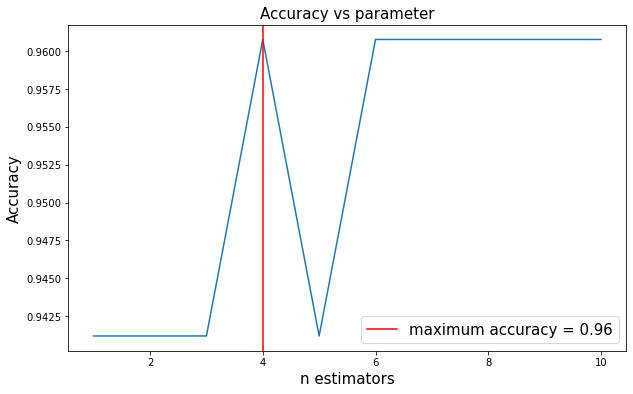

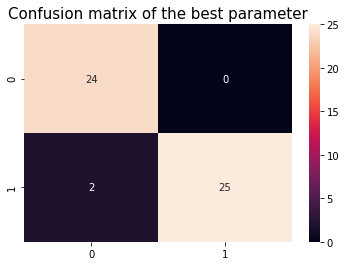

In [313]:
#explore the parameters range 
xgb_n_estimators_acc = []
xgb_n_estimators = np.arange (1,11,1)
for i in (xgb_n_estimators):
    xgb_model = xgb.XGBClassifier(n_estimators = i, random_state=42, eval_metric='logloss')
    xgb_model.fit(X_train, y_train)
    y_pred = xgb_model.predict(X_test)
    xgb_n_estimators_acc.append(accuracy_score(y_test, y_pred))

accuracy_plot(xgb_n_estimators, xgb_n_estimators_acc, 'n estimators')

# calculate the confusion matrix of the best parameter.
best_para = xgb_n_estimators[np.argmax(xgb_n_estimators_acc)]
best_xgb_model = xgb.XGBClassifier(n_estimators = best_para, random_state=42, eval_metric='logloss')
best_xgb_model.fit(X_train,y_train)
y_pred = best_xgb_model.predict(X_test)

# Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
plt.title('Confusion matrix of the best parameter',fontsize = 15)
sns.heatmap(cf_matrix, annot=True)
plt.show()


## Interpretation of result 

We can see from the result by tuning the n_estimators parameters, that most of the values of n estimator can give the maximum accuracy prediction of the test data set, except n_estimators = 5, which gives a slight decrease to the accuracy.

## Tuning parameters: subsample

The next parameter we are tuning is the subsample ratio we take from the training data set for training 

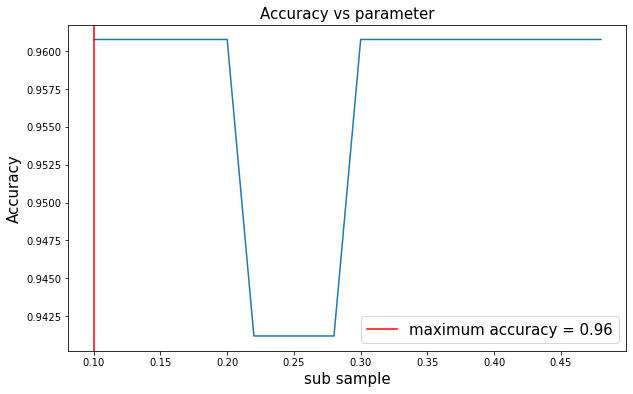

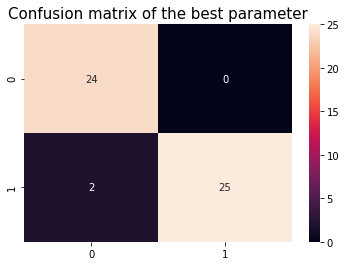

In [315]:
#explore the parameter range
xgb_subsample_acc= []
xgb_subsample = np.arange (.1,.5,.02)
for i in (xgb_subsample):
    xgb_model = xgb.XGBClassifier(subsample = i, random_state=42, eval_metric='logloss')
    xgb_model.fit(X_train, y_train)
    y_pred = xgb_model.predict(X_test)
    xgb_subsample_acc.append(accuracy_score(y_test, y_pred))

accuracy_plot(xgb_subsample, xgb_subsample_acc, 'sub sample')

# visualize the confusion matrix of the best parameter value.
best_para_subsample = xgb_subsample[np.argmax(xgb_subsample_acc)]
best_xgb_model_sub = xgb.XGBClassifier(subsample = best_para_subsample, random_state=42, eval_metric='logloss')
best_xgb_model_sub.fit(X_train,y_train)
y_pred = best_xgb_model_sub.predict(X_test)

# Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
plt.title('Confusion matrix of the best parameter',fontsize = 15)
sns.heatmap(cf_matrix, annot=True)
plt.show()


## Interpretation

For the ratio ranging from 0.22 to 0.28, the test accuracies drop to 0.94. The other subsample ratios can give accuracies of the test data up to 0.96. We believe that when the subsample ratios are set to be in the range (0.22,0.28), some training samples that are not representative cause the model to produce low accurate predictions while working with the test data. When the subsample ratio is lower than this range, those samples are not selected, and when the ratio is set higher, those samples take lower weight among the total selected subsamples, which both result in higher accuracy of the prediction on the testing set.

# Conclusion

All SVMs, Random Forest and XGBoost models manage to have a maximum test accuracy of 0.96 after tuning the parameters. And the confusion matrix of all the models shows that they all mistake in classifying two divorced couples into non divorced class. 

For SVMs, when the kernel function is set to be 'rbf', the test accuracy will increase with the increase of parameters 'C' and remains constant after reaching the maximum test accuracy. On the opposite, the test accuracy will gradually decrease with the increase of the parameter, "gamma" until reaching the minimum accuracy.

For random forest, both the increase of max_sample and n_estimators can give rise to the test accuracy.

For XGBoost, the increase of n_estimator will generally give an increase to the test accuracy, but in some  certain range, the increase of the n_estimator will cause the accuracy to dropdown. The tuning of the parameter 'subsample' does not influence the test accuracy, except for a small range, the accuracy will have a slight drop.
